# Data Wrangling Project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Gather

#### Twitter archive data

In [2]:
# import twitter archive of dog_rates twitter
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')

#### Predictions data

In [3]:
# download predictions
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open(url.split('/')[-1], mode = 'wb') as file:
#       file.write(response.content)

In [4]:
#read predictions data into a pandas DataFrame
predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

#### Twitter count data

In [5]:
# create an API object to gather twitter data
# consumer_key = 'CONSUMER KEY'
# consumer_secret = 'CONSUMER SECRET'
# access_token = 'ACCESS TOKEN'
# access_secret = 'ACCESS SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [6]:
# gather retweet count and favorite count via twitter api
# twitter_count = {}
# twitter_count['tweet_counts'] = []
# n = 0
# t = time.process_time()
# for tweet_id in twitter_archive.tweet_id:
#   
#    try:
#        tweet = api.get_status(tweet_id, mode = 'extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True )
#        twitter_count['tweet_counts'].append({
#            'tweet_id':tweet_id,
#            'retweet_count': tweet.retweet_count, 
#            'favorite_count': tweet.favorite_count
#        })
#        elapsed_time = time.process_time() - t
#        n = n+1
#        print(str(tweet_id) + '\n total elapsed time in sec: ' + str(round(elapsed_time, 2)) + ', no. ' + str(n))
        
#    except tweepy.TweepError:
#        print(str(tweet_id) + ' not found')
#        continue

# write twitter count data into json file
# with open('tweet_json.txt', 'w') as outfile:
#    json.dump(twitter_count, outfile)

In [7]:
# read twitter count data from json file   
with open('tweet_json.txt') as file:  
    twitter_count = json.load(file)

In [8]:
# read twitter count data into a pandas DataFrame
twitter_count = pd.DataFrame(twitter_count['tweet_counts'], 
                                columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_count = twitter_count.reset_index(drop=True)

## Assess

In [9]:
# display the twitter archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# DateFrame and columns info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# check if some tweet ids are duplicated
sum(twitter_archive.tweet_id.duplicated())

0

In [12]:
# how often particular rating numerator were given
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# how often particular rating denominators were used
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# frequency of rating numerators where denominator is 10
twitter_archive.rating_numerator[twitter_archive.rating_denominator == 10].value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [15]:
# tweet text for the row 45
twitter_archive.text.loc[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [16]:
# rating numerator for the row 45
twitter_archive.rating_numerator.loc[45]

5

In [17]:
# are there any duplicated names in the name column
sum(twitter_archive.name.duplicated())

1399

In [18]:
# value_counts on name column in order to reveal duplicates
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Bailey        7
Daisy         7
Buddy         7
an            7
Jax           6
Dave          6
Bella         6
Milo          6
Koda          6
Rusty         6
Leo           6
Oscar         6
Jack          6
Stanley       6
Scout         6
Bentley       5
           ... 
Rodney        1
Emanuel       1
Lillie        1
Danny         1
Cannon        1
Andru         1
Karll         1
Grey          1
Callie        1
Carbon        1
Creg          1
Monster       1
Blu           1
Poppy         1
Godzilla      1
Hall          1
Katie         1
Mo            1
Ester         1
River         1
Jareld        1
Traviss       1
Blanket       1
Grizzie       1
Heinrich      1
Goliath       1
Nigel         1
Pavlov        1
Lili          1
Tassy         1
Name: name, Length: 957,

In [19]:
# show words which were accidentically written into the name column
twitter_archive.name[twitter_archive.name.str.lower() == twitter_archive.name].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
mad              2
actually         2
getting          2
this             1
old              1
officially       1
my               1
such             1
incredibly       1
unacceptable     1
by               1
his              1
space            1
life             1
infuriating      1
all              1
light            1
Name: name, dtype: int64

In [20]:
# show entries with no dog category assigned to it
twitter_archive[(twitter_archive.doggo != 'doggo') & (twitter_archive.floofer != 'floofer') &
(twitter_archive.pupper != 'pupper') & (twitter_archive.puppo != 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [21]:
# how many duplicates are in the source column
twitter_archive.source.duplicated().value_counts()

True     2352
False       4
Name: source, dtype: int64

In [22]:
# show duplicates in the source column
twitter_archive[twitter_archive.source.duplicated() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None


In [23]:
# show first entry of source column
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [24]:
# show first entry of source column
twitter_archive.source[209]

'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'

In [25]:
# display the twitter count table
twitter_count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8444,38429
1,892177421306343426,6224,32922
2,891815181378084864,4125,24810
3,891689557279858688,8578,41777
4,891327558926688256,9307,39942
5,891087950875897856,3085,20052
6,890971913173991426,2052,11729
7,890729181411237888,18752,64883
8,890609185150312448,4235,27566
9,890240255349198849,7342,31630


In [26]:
# twitter count info
twitter_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [27]:
# basic statistics of retweets and favorites 
twitter_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422314e+17,2973.465385,8030.617094
std,6.834204e+16,4984.455358,12365.911465
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,597.750000,1390.750000
50%,7.186224e+17,1390.000000,3502.500000
75%,7.986989e+17,3469.250000,9862.250000
max,8.924206e+17,84550.000000,164595.000000


In [28]:
# show entries with zero favortite count but retweets larger than zero 
twitter_count[(twitter_count.favorite_count == 0) & 
                              (twitter_count.retweet_count > 0)]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,104,0
35,885311592912609280,18473,0
67,879130579576475649,6812,0
72,878404777348136964,1285,0
73,878316110768087041,6629,0
77,877611172832227328,80,0
90,874434818259525634,14744,0
95,873337748698140672,1592,0
106,871166179821445120,5733,0
120,868639477480148993,2130,0


In [29]:
# show entries with zero retweet count but favorite larger than zero 
twitter_count[(twitter_count.favorite_count > 0) & 
                              (twitter_count.retweet_count == 0)]

,tweet_id,retweet_count,favorite_count
283,838085839343206401,0,147


In [30]:
# display the predictions table
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
# predictions table info
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# sample of 20 entries in the predictions table
predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True
1502,784517518371221505,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
650,681981167097122816,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,Labrador_retriever,0.452577,True,golden_retriever,0.403420,True,beagle,0.069486,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1148,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False


In [33]:
# this tweet doesn't have a picture of a dog in it
predictions[predictions.tweet_id == 666104133288665088]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


In [34]:
# how many tweets images have no dogs in them according to predictions table
predictions[(predictions.p1_dog == False) & (predictions.p2_dog == False) &
(predictions.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### Data quality
`twitter_archive` table
- *tweet_id* should be string and not integer since we are not going to add or substracht tweet ids.
-  the same for *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, they should be not float type but strings
- *timestamp* and *retweeted_status_timestamp* should be datetime type
- *denominator* is not allways 10 which makes it not easy to compare ratings across tweets
- *numerator* columns also contains some very unusual values such as 666 and 1776, two entries have a numerator of 0
- *numerator* should be float type
- *name* column displays some random words instead of names written in lower case. Names are written in upper case
- *doggo*, *floofer*, *pupper*, *puppo* should be categorical variables
- mising names for 745 entries
- 1976 entries have no dog category assigned to it (neither *doggo* nor *floofer*, neither *pupper* nor *puppo*)
 
`twitter_count` table
- only 2340 observations in the `twitter_count` table vs. 2356 observations in the `twitter_archive` table
- 167 entries have zero *favorite_count* but non-zero *retweet_count*

`predictions` table
- some predictions do not even contain dogs types but other things, e.g. first and second images for the tweet_id 788908386943430656 were recognized not as dogs but as remote_control and oscilloscope respectively. It is indicated by the columns p1_dog, p2_dog and p3_dog, that some predictions are not dogs. Predictions of things other than dogs are not relevant here
- in some cases none of the predictions indicates that an image is one of a dog such as the image in the tweet 666104133288665088
- only 2075 observations in the `predictions` table vs. 2356 observations in the `twitter_archive` table

### Data tidinesss
`twitter_archive` table
- *doggo*, *floofer*, *pupper*, *puppo* should not be columns but variables in one column

`twitter_count` and `twitter_archive` table should be stored in one table since they both contain general information on tweets



## Clean

In [35]:
# make copies of data to be cleaned
twitter_archive_clean = twitter_archive.copy()
twitter_count_clean = twitter_count.copy()
predictions_clean = predictions.copy()

### Missing data

#### Missing names for 745 entries and missing dog category for 1976 entries  in the `twitter_archive` table

Some dogs have no categories and no names presented in the table but as long as they have ratings and were identified as dogs it is not a problem and there is no need to clean it except for trying to extract correct names where it wasn't done yet.

#### 16 missing observations in the `twitter_count` table which are present in the `twitter_archive` table

Since missing tweets are not online anymore we can no longer gather data on its favorite and retweet counts to fill in missing data. We can drop rows where count data is missing later when we join `twitter_archive` and `twitter_count` tables.

#### 167  observations in the *twitter_count* table show zero favorite count but non-zero retweet count

This is unusual and makes one suspicious, in fact, by checking some of these tweets online on twitter there is non-zero favorite count as expected, it just wasn't exrtacted properly.

##### Define

Change entries with zero favorite_count and non zero retweet_count by setting favorite_count and retweet_count values to NaN

##### Code

In [36]:
# change values of favorite count to NaN where favortite count is zero but retweet is non-zero
twitter_count_clean.loc[(twitter_count_clean.favorite_count == 0) & (twitter_count_clean.retweet_count > 0), 
                        'favorite_count'] = 'nan'

##### Test

In [37]:
# check if any entries with zero favortite count but non zero retweets are left 
twitter_count_clean[(twitter_count_clean.favorite_count == 0) & 
                              (twitter_count_clean.retweet_count > 0)]

,tweet_id,retweet_count,favorite_count


#### Missing observations in the `predictions` table - only 2075 observations vs. 2356 observations in the `twitter_archive` table

Similar to twitter count data since there is no access to predictions algorithm, missing data can not be added. Futhermore, since the `predictions table` indicates that not all the pictures have dogs in them, relevant predictions data is even smaller since non of three predictions for 324 entries identified dog pictures.

### Tidiness

#### Present *doggo*, *floofer*, *pupper*, *puppo* in the `twitter_archive` table as variables in one column 

##### Define

Melt *doggo*, *floofer*, *pupper* and *puppo* to a *stage* column

##### Code

In [38]:
# Add new column in order to account for those tweets which don't name dogs stages
twitter_archive_clean['no_stage'] = 'None'

In [39]:
# assign value indicating that there is no stage given where it applies
twitter_archive_clean.loc[(twitter_archive_clean.doggo == 'None') & (twitter_archive_clean.floofer == 'None') & 
                          (twitter_archive_clean.pupper == 'None') & (twitter_archive_clean.puppo == 'None'), 
                          'no_stage'] = 'no_stage'

In [40]:
# melt four dog stages columns into one category column and one value column
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                          id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 
                                   'text', 'retweeted_status_id', 'retweeted_status_user_id', 
                                   'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 
                                   'rating_denominator', 'name'],
                          value_vars=['doggo', 'floofer', 'pupper', 'puppo', 'no_stage'], 
                          var_name='category', value_name ='stage')

In [41]:
# delete empty duplicate entries
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.stage != 'None']

In [42]:
# drop the category column
twitter_archive_clean = twitter_archive_clean.drop('category', axis=1)

In [43]:
# check for duplicates
sum(twitter_archive_clean.tweet_id.duplicated())

14

In [44]:
# which ids are duplicated
twitter_archive_clean.tweet_id[twitter_archive_clean.tweet_id.duplicated() == True]

2556    854010172552949760
5172    817777686764523521
5243    808106460588765185
5277    802265048156610565
5287    801115127852503040
5417    785639753186217984
5445    781308096455073793
5490    775898661951791106
5534    770093767776997377
5601    759793422261743616
5668    751583847268179968
5775    741067306818797568
5825    733109485275860992
7259    855851453814013952
Name: tweet_id, dtype: int64

In [45]:
# what are corresponding stages values of duplicates
twitter_archive_clean.stage[twitter_archive_clean.tweet_id.duplicated() == True]

2556    floofer
5172     pupper
5243     pupper
5277     pupper
5287     pupper
5417     pupper
5445     pupper
5490     pupper
5534     pupper
5601     pupper
5668     pupper
5775     pupper
5825     pupper
7259      puppo
Name: stage, dtype: object

In [46]:
# delete duplicated rows
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated() == True]
# make a dictionary with index numbers of duplicates as keys and stages as values
stage_add_dict = {854010172552949760: 'floofer', 817777686764523521: 'pupper', 808106460588765185: 'pupper', 
                802265048156610565: 'pupper', 801115127852503040: 'pupper', 785639753186217984: 'pupper', 
                781308096455073793: 'pupper', 775898661951791106: 'pupper', 770093767776997377: 'pupper', 
                759793422261743616: 'pupper', 751583847268179968: 'pupper', 741067306818797568: 'pupper', 
                733109485275860992: 'pupper', 855851453814013952: 'puppo'}

# loop through dictionary and add values to the stage_add column
for key, value in stage_add_dict.items():
    row = twitter_archive_clean.tweet_id == key
    twitter_archive_clean.loc[row, 'stage'] =  twitter_archive_clean.loc[row, 'stage'] + ', ' + value

# drop duplicates
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated() == False]

##### Test

In [47]:
# are there any duplicates left
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


In [48]:
# check if the number of rows corresponds to the original DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 9 to 11779
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


In [49]:
# have a look at those entries for which two dog stages were specified
twitter_archive_clean[twitter_archive_clean.tweet_id == 854010172552949760]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,"doggo, floofer"


In [50]:
# show first six entries of the twitter archive table
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


#### `twitter_count` and `twitter_archive` table should be stored in one table since they both contain general information on tweets

##### Define

Merge `twitter_count` and `twitte_archive` tables on *tweet_id* columnn

##### Code

In [51]:
# merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_count_clean, 
                                on = ['tweet_id'], how = 'left')

##### Test

In [52]:
# show first six rows
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7342.0,31630
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2962.0,20195
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5414.0,27234
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3474.0,20145
4,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,5538.0,20880


In [53]:
# info for the new table
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null object
retweet_count                 2340 non-null float64
favorite_count                2340 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 312.9+ KB


#### Change data types for various columns in the `twitter_archive_clean` DataFrame

##### Define

Change data types as following:
- *tweet_id* (both `twitter_archive_clean` and `predictions` table), *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* to string
- *timestamp* and *retweeted_status_timestamp* to datetime type
- *stage* and *stage_add* to categorical variable
- *retweet_count* and *favorite_count* to integer
- *rating_numerator* and *rating_denominator* to float will be changed later when extracting right values

##### Code

In [54]:
# change variables to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_id.astype(str)

In [55]:
# change variables to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

In [56]:
# change variables to categorical variable
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')

##### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null category
retweet_count                 2340 non-null float64
favorite_count                2340 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(2),

#### *rating_numerator* is wrongly extracted sometimes 

##### Define

extract *rating_numerator* from the *text* using regular expressions, check tweet texts againe in cases where values appear to be out of normal rating scale range

##### Code

In [58]:
# replace numerators by extracting the correct rating numerator by using a regular expression
twitter_archive_clean.rating_numerator = twitter_archive_clean.text.str.extract('(\d+.\d*/)', expand=True)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.str[:-1]

In [59]:
twitter_archive_clean.rating_numerator.value_counts()

12       558
11       465
10       463
13       352
14        56
9.75       2
15         2
420        2
44         1
20         1
144        1
143        1
165        1
60         1
88         1
13.5       1
84         1
204        1
007        1
3 13       1
80         1
11.27      1
182        1
24         1
99         1
121        1
3 1        1
45         1
17         1
1776       1
960        1
11/15      1
666        1
11.26      1
50         1
9.5        1
Name: rating_numerator, dtype: int64

In [60]:
# create a list with outliers and strange values for rating numerators
check_numerators = ['420', '9.75', '143', '960', '99', '11.26', '1776', '50', '165', '80', '24', '9.5', '20', '60', 
                    '11/15', '121', '666', '88', '13.5', '204', '17', '3 13', '007', '3 1', '182', '144', '11.27', '45',
                    '44', '84']

# set display option at the maximum allowed number of characters in a tweet 
pd.options.display.max_colwidth = 280

# print tweet texts to check whether the numerators in the check_numerators list has been correctly extracted  
for numerator in check_numerators:
    print(twitter_archive_clean.text[twitter_archive_clean.rating_numerator == numerator])

542     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
675    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
957                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object
1709    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
653    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
1377    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object
1771    Here we have uncovered an entire 

In [61]:
# create dictionary with wrongly extracted and correct ratings
rating_numerator_corr_dict = {'50': '11', '24': 'nan', '11/15':'nan', '17':'13', '007': 'nan', '20': 'nan', '3 1': '9',
                         '3 13': '13'}

# loop through dictionary and correct values for rating numerators
for key, value in rating_numerator_corr_dict.items():
    row = twitter_archive_clean.rating_numerator == key
    twitter_archive_clean.loc[row, 'rating_numerator'] = value

In [62]:
# change variable type to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')

##### Test

In [63]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      466
10.00      463
13.00      354
14.00       56
9.75         2
15.00        2
420.00       2
9.50         1
13.50        1
960.00       1
84.00        1
80.00        1
60.00        1
44.00        1
143.00       1
144.00       1
121.00       1
9.00         1
11.26        1
11.27        1
99.00        1
666.00       1
1776.00      1
204.00       1
45.00        1
165.00       1
182.00       1
88.00        1
Name: rating_numerator, dtype: int64

In [64]:
# show entries where rating is above 15 but the denominator is 10
twitter_archive_clean.text[(twitter_archive_clean.rating_numerator > 15) & 
                           (twitter_archive_clean.rating_denominator == 10)]

542                                                    @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
543     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
634                                                                                                                        @markhoppus 182/10
1181                                                           This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
2074                                                      After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object

#### extract correct rating denominators

##### Define

##### Extract correct rating denominators using regular expressions

##### Code

In [65]:
# replace numerators by extracting the correct rating denominator by using a regular expression
twitter_archive_clean.rating_denominator = twitter_archive_clean.text.str.extract('(/\d*)', expand=True)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.str[1:]

In [66]:
twitter_archive_clean.rating_denominator.value_counts()

10     2330
11        3
          3
50        3
80        2
20        2
00        1
15        1
120       1
150       1
170       1
90        1
110       1
16        1
70        1
7         1
2         1
40        1
130       1
Name: rating_denominator, dtype: int64

In [67]:
# create a list with outliers and strange values for rating numerators
check_denominators = ['', '11', '50', '20', '80', '40', '90', '7', '16', '150', '130', '15', '2', '70', '120', '110',
                    '170', '00']

# set display option at the maximum allowed number of characters in a tweet 
pd.options.display.max_colwidth = 280

# print tweet texts to check whether the numerators in the check_numerators list has been correctly extracted  
for denominator in check_denominators:
    print(twitter_archive_clean.text[twitter_archive_clean.rating_denominator == denominator])


1111               RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ
1396    What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz
1854                                                   This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
Name: text, dtype: object
1025    RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1248    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1729     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object
1352                                 This is Bluebert. He just 

In [68]:
# create dictionary with wrongly extracted and correct ratings
rating_denominator_corr_dict = {'':'10', '11': '10', '7': 'nan', '16': 'nan', '15': 'nan',
                                '2': '10', '00': '10'}

# loop through dictionary and correct values for rating numerators
for key, value in rating_denominator_corr_dict.items():
    row = twitter_archive_clean.rating_denominator == key
    twitter_archive_clean.loc[row, 'rating_denominator'] = value

In [69]:
# go through '50' denominators
twitter_archive_clean.text[twitter_archive_clean.rating_denominator == '50']

1352                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1419    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1485                                                                    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object

In [70]:
twitter_archive_clean.tweet_id[twitter_archive_clean.rating_denominator == '50']

1352    716439118184652801
1419    709198395643068416
1485    704054845121142784
Name: tweet_id, dtype: object

In [71]:
#change one wrongly extracted '50'-denominator but leave the two others
row = twitter_archive_clean.tweet_id == '716439118184652801'
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [72]:
# go through '20' denominators
twitter_archive_clean.text[twitter_archive_clean.rating_denominator == '20']

1322                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1684    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object

In [73]:
twitter_archive_clean.tweet_id[twitter_archive_clean.rating_denominator == '20']

1322    722974582966214656
1684    686035780142297088
Name: tweet_id, dtype: object

In [74]:
#change two wrongly extracted '20'-denominators 

row = twitter_archive_clean.tweet_id == '722974582966214656'
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

row = twitter_archive_clean.tweet_id == '686035780142297088'
twitter_archive_clean.loc[row, 'rating_denominator'] = 'nan'

In [75]:
# change type to float
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float') 

##### Test

In [76]:
# show frequency of rating denominators
twitter_archive_clean.rating_denominator.value_counts()

10.0     2340
50.0        2
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

In [77]:
# show statistics for rating_denominator
twitter_archive_clean.rating_denominator.describe()

count    2352.000000
mean       10.433673
std         6.687967
min        10.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [78]:
# show entries where denominator does not equal 10
twitter_archive_clean.text[twitter_archive_clean.rating_denominator != 10]

677                                                                                                                                      @docmisterio account started on 11/15/15
745                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
808     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1125                                                                                               Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1287                                                    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1377                                                                                Happy Saturday here's 9 pu

#### *name* column displays some random wordswritten in lower case instead of dog names 

##### Define

Extract right names using regular expressions

##### Code

In [79]:
twitter_archive.name[twitter_archive.tweet_id == 667538891197542400]

2264    a
Name: name, dtype: object

In [80]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Bailey        7
Daisy         7
Buddy         7
an            7
Jax           6
Dave          6
Bella         6
Milo          6
Koda          6
Rusty         6
Leo           6
Oscar         6
Jack          6
Stanley       6
Scout         6
Bentley       5
           ... 
Rodney        1
Emanuel       1
Lillie        1
Danny         1
Cannon        1
Andru         1
Karll         1
Grey          1
Callie        1
Carbon        1
Creg          1
Monster       1
Blu           1
Poppy         1
Godzilla      1
Hall          1
Katie         1
Mo            1
Ester         1
River         1
Jareld        1
Traviss       1
Blanket       1
Grizzie       1
Heinrich      1
Goliath       1
Nigel         1
Pavlov        1
Lili          1
Tassy         1
Name: name, Length: 957,

In [81]:
# set display options for number of rows 
pd.options.display.max_rows = 150

twitter_archive_clean.text[twitter_archive_clean.name.str.lower() == twitter_archive_clean.name]

64                                                              RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
74                            This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
83                             That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7
87                                                                             This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
108            Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
150                                     RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrate

In [82]:
# extract names for those where words had been extracted
twitter_archive_clean.name = twitter_archive_clean.text.str.extract('(This is [A-Z][a-z]+|this is [A-Z][a-z]+|name is [A-Z][a-z]+|named [A-Z][a-z]+|Meet [A-Z][a-z]+|Say hello to [A-Z][a-z]+)', expand=True) 


In [83]:
# replace phrases preceeding names with empty string
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('(This is |named|name is |Meet |Say hello to )', '')


##### Test

In [84]:
# sample of the name column values
twitter_archive_clean.name.sample(25)

1329     Charleson
247            NaN
1664         Ember
411         Howard
991           Koda
886          Romeo
1791           Evy
484         Cooper
1756         Panda
1604         Edgar
1337           NaN
162          Louie
516            NaN
438        Duddles
1993           NaN
1082          Tove
179            NaN
1628          Lolo
1384         Sunny
2206          Zeek
593            NaN
489            NaN
1405           NaN
2311     Octaviath
2156          Skye
Name: name, dtype: object

In [85]:
# check if any lower case words are left
sum(twitter_archive_clean.name[twitter_archive_clean.name.str.lower() == 
                                                        twitter_archive_clean.name].value_counts())

0

In [86]:
# frequency of names
twitter_archive_clean.name.value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Bailey         7
Daisy          7
Toby           7
Buddy          7
Jack           6
Scout          6
Bella          6
Oscar          6
Jax            6
Koda           6
Rusty          6
Leo            6
Milo           6
Stanley        6
Chester        5
Bentley        5
Sammy          5
Alfie          5
Zoey           5
Phil           5
Gus            5
Louis          5
Oakley         5
Dave           5
Larry          5
Sunny          5
Finn           5
Duke           4
Shadow         4
Moose          4
Bear           4
Carl           4
Derek          4
Luna           4
Clark          4
Scooter        4
George         4
Reginald       4
Beau           4
Sampson        4
Walter         4
Maggie         4
Loki           4
Gerald         4
Winnie         4
Dexter         4
Maddie         4
Reggie         4
Boomer        

#### Predictions table includes entries where no dog but other images were identified

##### Define

Eliminate entries with no dogs predictions from the `predictions` DataFrame

##### Code

In [87]:
# subset the predictions DataFrame 
predictions_clean = predictions_clean[(predictions_clean.p1_dog == True) & (predictions_clean.p2_dog == True) &
(predictions.p3_dog == True)]

# drop p1_dog, p2_dog, p3_dog columns
predictions_clean = predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

##### Test

In [88]:
predictions_clean.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
336,672222792075620352,https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg,1,beagle,0.958178,basset,0.009117,Italian_greyhound,0.007731
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,miniature_poodle,0.059192,Irish_terrier,0.035306
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,golden_retriever,0.282017,miniature_poodle,0.090032
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,beagle,0.437527,basset,0.010585
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,kelpie,0.227402,vizsla,0.103246
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,standard_poodle,0.173685,Great_Pyrenees,0.157081
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,French_bulldog,0.076359,Brabancon_griffon,0.035007
1053,714214115368108032,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.533967,bloodhound,0.164826,German_shepherd,0.046524
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,Italian_greyhound,0.129683,toy_terrier,0.089153
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235,Shetland_sheepdog,0.011037,Appenzeller,0.003971


## Store

In [89]:
# merge predictions and twitter archive data into master dataset
twitter_archive_master = pd.merge(twitter_archive_clean, predictions_clean, 
                                on = ['tweet_id'], how = 'left')

In [90]:
# store master dataset as csv
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

## Analyze

In [91]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

### Insight no. 1

In [92]:
# show simple statistics of favorite count
twitter_archive_master.favorite_count.describe()

count      2173.000000
mean       8647.788311
std       12622.736577
min          51.000000
25%        1847.000000
50%        3900.000000
75%       10763.000000
max      164595.000000
Name: favorite_count, dtype: float64

In [93]:
# show simple statistics of retweet count
twitter_archive_master.retweet_count.describe()

count     2340.000000
mean      2973.465385
std       4984.455358
min          0.000000
25%        597.750000
50%       1390.000000
75%       3469.250000
max      84550.000000
Name: retweet_count, dtype: float64

The popularity of the twitter account measured by favorite and retweet numbers is quite high.

### Insight no. 2

In [94]:
# frequency of dog names
twitter_archive_master.name.value_counts().head(10)

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
Penny      10
Lola       10
Winston     9
Bo          9
Sadie       8
Name: name, dtype: int64

The most common dog name in the dataset is Charlie (12 counts), followed by Cooper, Lucy and Oliver (each 11 counts). The thrird place is shared by Tucker, Lola and Penny (each 10 counts).

### Insight no. 3

In [95]:
# frequency of dog types according to the first prediction
twitter_archive_master.p1.value_counts().head(3)

golden_retriever      126
Pembroke               78
Labrador_retriever     77
Name: p1, dtype: int64

In [96]:
# frequency of dog types according to the second prediction
twitter_archive_master.p2.value_counts().head(3)

Labrador_retriever    74
Cardigan              64
golden_retriever      58
Name: p2, dtype: int64

In [97]:
# frequency of dog types according to the third prediction
twitter_archive_master.p3.value_counts().head(3)

Labrador_retriever    64
Chihuahua             49
golden_retriever      34
Name: p3, dtype: int64

Golden retriever and labrador retriever are the most common types of dogs seen in the tweets according to the predictions dataset.

### Insight no. 4 + Visualization

In [98]:
# freuqency of dog stage 
twitter_archive_master.stage.value_counts()

no_stage          1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

And pupper is the most common dog stage represented in the tweets.

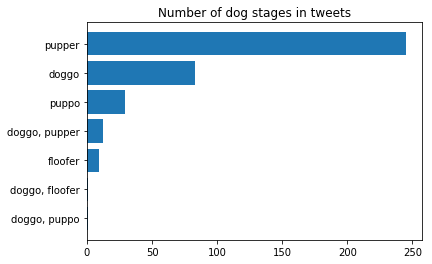

In [124]:
# value counts only on a subset master DataFrame by choosing only those entries where dog stages are specified
dog_stages = twitter_archive_master.stage[twitter_archive_master.stage != 'no_stage'].value_counts()

# create a DataFrame of stages and counts
counts_df = dog_stages.rename_axis('stages').reset_index(name='counts')

# bar chart of dog stages
n = np.arange(len(dog_stages))
plt.barh(n, counts_df.counts)
plt.yticks(n, counts_df.stages)
plt.title('Number of dog stages in tweets')
plt.gca().invert_yaxis()
plt.show()

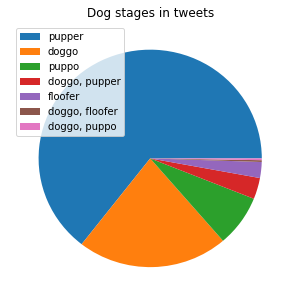

In [163]:
# pie plot
# counts_df.plot.pie()
# series = pd.Series(counts_df.counts) , index = counts_df.stages)
counts_s = pd.Series(counts_df['counts'].values, index=counts_df['stages'], name='')
counts_s.plot.pie(figsize=(5, 5), labels=['','','','', '','',''])
plt.title('Dog stages in tweets')
plt.legend(loc='upper left', labels = counts_s.index)


### Insight no. 5 + Visualization

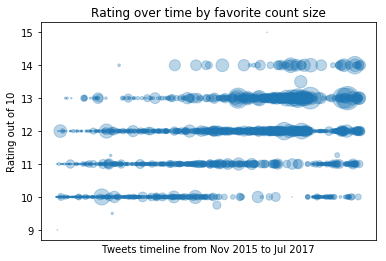

In [100]:
# subset the DataFrame to remove outliers
twitter_archive_master_subset = twitter_archive_master[(twitter_archive_master.rating_numerator < 17) &
                                                      (twitter_archive_master.rating_denominator == 10)]
# try plotting rating over time by favorite count size
try:
    
    x = twitter_archive_master_subset.timestamp # time
    y = twitter_archive_master_subset.rating_numerator 
    area = twitter_archive_master_subset.favorite_count / 300
    plt.scatter(x, y, s=area, alpha=0.3)
    plt.xticks([])
    plt.gca().invert_xaxis()
    plt.title('Rating over time by favorite count size')
    plt.ylabel('Rating out of 10')
    plt.xlabel('Tweets timeline from Nov 2015 to Jul 2017')

except ValueError:
    print('could not plot because could not convert to required data type')
    
except TypeError:
    print('could not plot because could not convert to required data type')

Favorite count increased over time together with better ratings for dogs.

### Insight no. 6 + Visualization

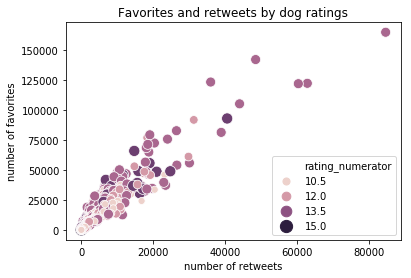

In [101]:
# subset the DataFrame to remove rating outliers
twitter_archive_master_subset = twitter_archive_master[(twitter_archive_master.rating_numerator < 17) &
                                                      (twitter_archive_master.rating_numerator > 10) &
                                                       (twitter_archive_master.rating_denominator == 10)]

# plot retweet count vs. favorite count by rating color and size
sns.scatterplot(x='retweet_count', y='favorite_count',
                         hue='rating_numerator', size='rating_numerator',  sizes=(50, 150),
                         data=twitter_archive_master_subset).set(
    xlabel='number of retweets', ylabel='number of favorites')

plt.legend(loc='lower right')
plt.title('Favorites and retweets by dog ratings')
plt.show()

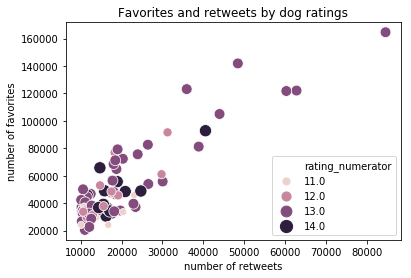

In [102]:
# subset the DataFrame to remove rating outliers and show only very popular tweets 
twitter_archive_master_subset_extra = twitter_archive_master[(twitter_archive_master.rating_numerator < 17) &
                                                      (twitter_archive_master.rating_numerator > 10) &
                                                       (twitter_archive_master.rating_denominator == 10) &
                                                      (twitter_archive_master.retweet_count > 10000) &
                                                      (twitter_archive_master.favorite_count > 20000)]

# plot retweet count vs. favorite count by rating color and size
sns.scatterplot(x='retweet_count', y='favorite_count',
                         hue='rating_numerator', size='rating_numerator',  sizes=(50, 150),
                         data=twitter_archive_master_subset_extra).set(
    xlabel='number of retweets', ylabel='number of favorites')

plt.legend(loc='lower right')
plt.title('Favorites and retweets by dog ratings')
plt.show()

In [103]:
twitter_archive_master_subset_extra.rating_numerator.value_counts()

13.0    49
12.0    13
14.0    12
11.0     8
Name: rating_numerator, dtype: int64

High popularity measured by retweets above 10 thousand and favorites above 20 thousand tend to be achieved mostly by tweets which gave dogs higher ratings.

### *Versions used in this notebook*

In [104]:
# Python version
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)


In [105]:
# jupyter notebook 4.4.0

In [106]:
# pandas version
pd.__version__

'0.23.4'

In [107]:
# matplotlib version
import matplotlib
matplotlib.__version__

'2.2.3'